In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_classification
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from random import randrange
from random import seed
from csv import reader
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [265]:
data = pd.read_csv('mlbdata.csv')
data = data.dropna()
scaler = MinMaxScaler()
# data[["ASG", "WAR/pos", "G", "PA", "AB", "R", "H", "2B", "3B", "HR", "RBI", "SB", "CS", "BB"
#             , "SO", "BA", "OBP", "SLG", "OPS", "Age"]] = scaler.fit_transform(data[["ASG", "WAR/pos", "G", "PA", "AB", "R", "H", "2B", "3B", "HR", "RBI", "SB", "CS", "BB"
#             , "SO", "BA", "OBP", "SLG", "OPS", "Age"]])
data['ASG'] = data['ASG'].apply(lambda x: 1 if x > 0 else 0)
data.head()

,Name,ASG,WAR/pos,G,PA,AB,R,H,2B,3B,...,CS,BB,SO,BA,OBP,SLG,OPS,Age,Tm,ROY
0,Austin Adams,0,0.0,13,2,2,0,0,0,0,...,0,0,2,0.000,0.000,0.000,0.000,28,TOT,0
1,Dario Agrazal,0,-0.1,14,24,22,0,2,0,0,...,0,0,9,0.091,0.087,0.091,0.178,24,PIT,0
2,Sandy Alcantara,1,-0.3,45,76,70,2,5,1,0,...,0,2,54,0.071,0.110,0.086,0.195,23,MIA,0
4,Kolby Allard,0,0.4,4,5,3,1,1,0,0,...,0,0,0,0.333,0.333,0.333,0.667,21,TEX,0
5,Austin Allen,0,-0.6,48,103,96,5,20,5,0,...,0,7,35,0.208,0.262,0.292,0.554,25,SDP,0


In [231]:
# feat_cols = ["ASG", "WAR/pos", "G", "H", "HR", "SO", "BA", "SLG"]
#feat_cols = ["ASG", "WAR/pos", "G", "H", "HR", "RBI", "SO", "SLG"]
# feat_cols = ["G", "R", "H", "HR","SO", "BA", "OBP", "SLG"]
feat_cols = ["WAR/pos", "G", "PA", "AB", "H", "HR", "BB", "SO", "BA", "OBP", "OPS", "Age"]
feat_cols2 = ["WAR/pos", "G", "PA", "AB", "R", "H", "2B", "HR", "RBI", "CS", "BB", "SO", "BA", "OBP", "SLG", "OPS", "Age"]
X = data[feat_cols] #features
X2 = data[feat_cols2]
y = data.ASG #target column
# ax = sns.countplot(x="ASG", data=data)

In [232]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=25)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2, y, test_size=0.30, random_state=25)

In [243]:
clf = DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred) * 100,'%')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
y_pred_prob = clf.predict_proba(X_test)[:,1]
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_prob))

Accuracy: 88.14049586776859 %
Confusion Matrix:
 [[1904   74]
 [ 213  229]]
F1 Score:  0.614765100671141
ROC AUC Score:  0.8461618527787564


In [234]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
WAR/pos,0.619820
SO,0.108748
Age,0.064985
H,0.056697
OBP,0.039264
OPS,0.033850
G,0.026051
AB,0.023423
HR,0.014327
BA,0.008118


In [235]:
# "ASG", "WAR/pos", "G", "H", "HR", "SO", "BA", "SLG"]
# clf.predict([[2, 20.1, 424, 413, 119, 575, 0.272, 0.558]])
# clf.predict([[0, 1.3, 42, 29, 5, 43, 0.210, 0.377]])
# clf.predict([[0,1.7,317,73,17,100,0.264,0.477]]) #Kyle Lewis

In [244]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=200, max_depth = 5)
rand_forest.fit(X2_train,y2_train)
y_2_pred = rand_forest.predict(X2_test)
print("Accuracy:",accuracy_score(y2_test, y_2_pred) * 100, '%')
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_2_pred))
print("F1 Score: ",f1_score(y2_test,y_2_pred))
y_2_pred_prob = rand_forest.predict_proba(X2_test)[:,1]
print("ROC AUC Score: ", roc_auc_score(y2_test, y_2_pred_prob))

Accuracy: 88.67768595041322 %
Confusion Matrix:
 [[1909   69]
 [ 205  237]]
F1 Score:  0.6336898395721925
ROC AUC Score:  0.8960299722284496


In [238]:
feature2_importances = pd.DataFrame(rand_forest.feature_importances_, index = X2_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
feature2_importances

,importance
WAR/pos,0.155929
H,0.122526
PA,0.120658
AB,0.110055
RBI,0.106424
R,0.068749
2B,0.057348
OBP,0.039751
SO,0.038702
G,0.038593


In [197]:
from sklearn import svm
clf_3 = svm.SVC(kernel = 'rbf') #Rbf Kernal
clf_3.fit(X_train, y_train)
y_3_pred = clf_3.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_3_pred) * 100, '%')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_3_pred))
print("F1 Score: ",f1_score(y_test,y_3_pred))
y_3_pred_prob = clf_2.predict_proba(X_test)[:,1]
print("ROC AUC Score: ", roc_auc_score(y_test, y_3_pred_prob))

Accuracy: 87.14876033057851 %
Confusion Matrix:
 [[1919   59]
 [ 252  190]]
F1 Score:  0.5499276410998554
ROC AUC Score:  0.8964017083849951


In [138]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# np.array(list(zip(y_test.to_numpy(),y_pred)))

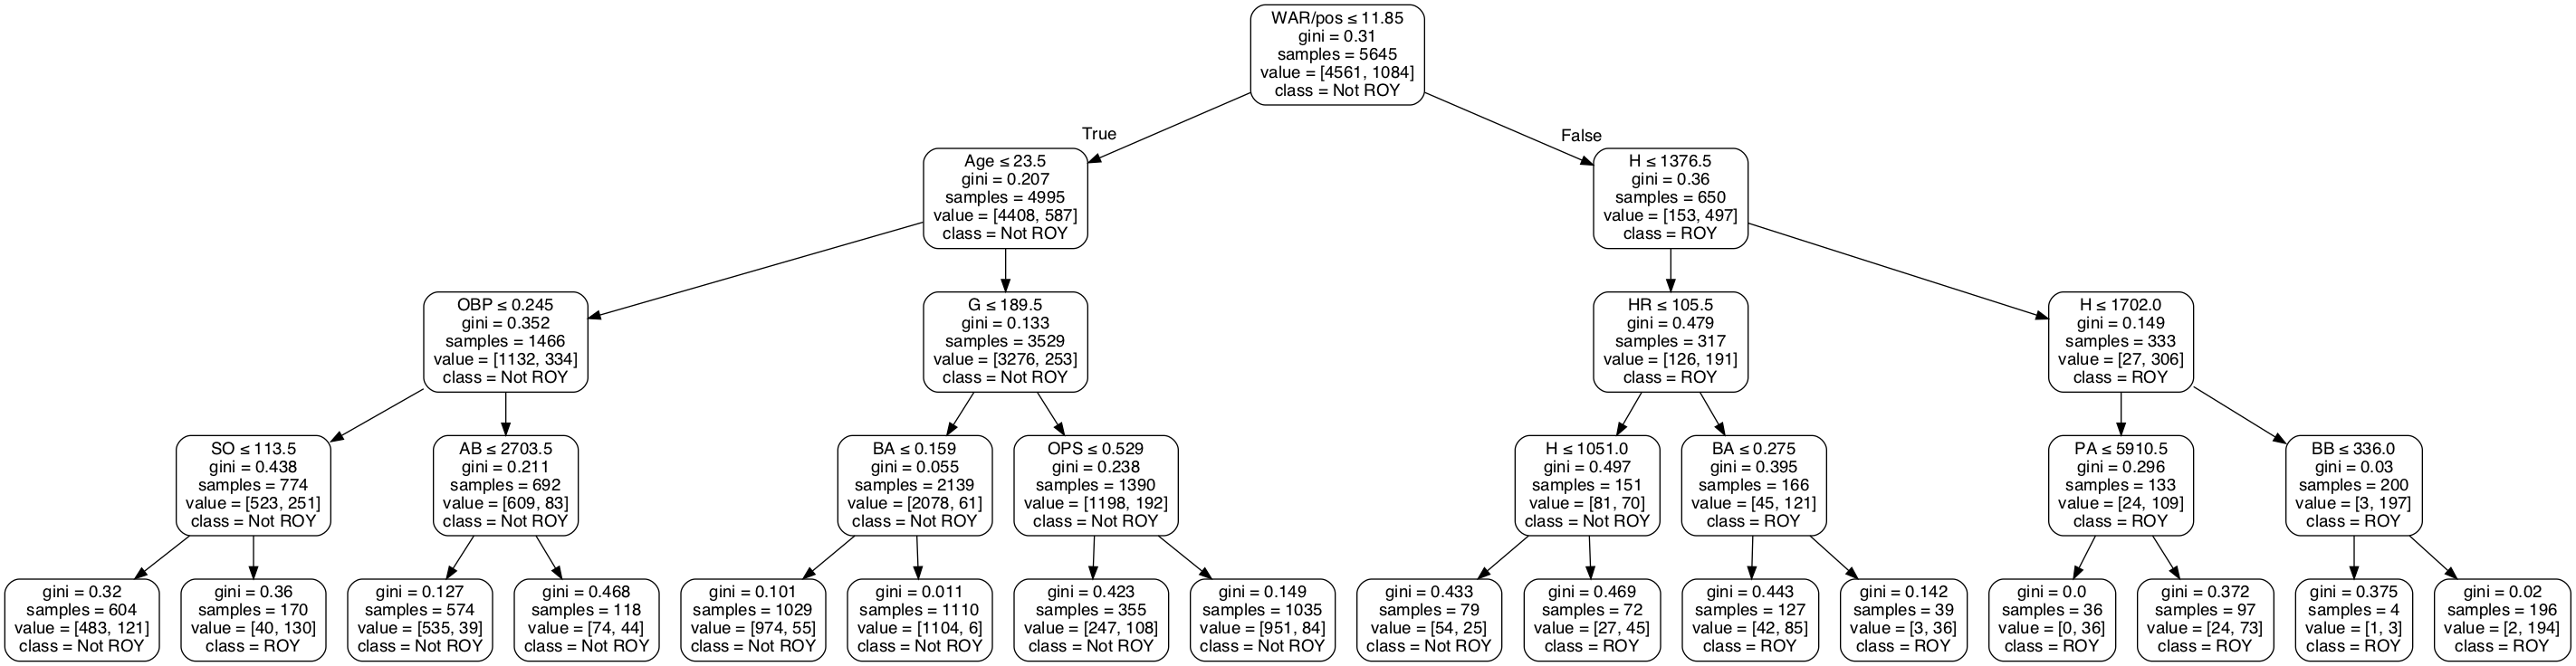

In [139]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=False, rounded=True,
                special_characters=True,feature_names = feat_cols,class_names=['Not ROY','ROY'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mlb.png')
Image(graph.create_png())

In [262]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(max_depth = 4)))
models.append(("RF", RandomForestClassifier(n_estimators=100, max_depth = 5)))
models.append(('G', GaussianNB()))
models.append(('SVM', SVC(kernel = 'rbf')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.862233 (0.031879)
LDA: 0.866325 (0.030538)
KNN: 0.873024 (0.023088)
DT: 0.878479 (0.019725)
RF: 0.883317 (0.018439)
G: 0.840284 (0.036632)
SVM: 0.867688 (0.030062)


In [246]:
from joblib import dump, load
dump(rand_forest, "rand_forest.pk1")

['rand_forest.pk1']

In [263]:
data["ASG"].sum()

1526